In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
#from cddd.inference import InferenceModel
#from cddd.preprocessing import preprocess_smiles # CDDD no se puede usar para todas las moleculas
# Porque el processing elimina los que tiene heavy toms menores de 3 y los mayores de 50
# # tambien filtra por logP
from transformers import AutoModel, AutoTokenizer
import torch
import numpy as np
import datamol as dm
import dask.dataframe as dd
from rdkit.Chem import MACCSkeys

In [2]:
def get_hac(smi: str) -> int:
    """Calculate Heavy Atom Count (HAC) from SMILES
    
    Parameters
    ----------
    smi : str
        SMILES string
    """
    mol = Chem.MolFromSmiles(smi)
    return mol.GetNumHeavyAtoms() if mol else 0

### Morgan fingerprints

In [4]:
#dask_17 = dd.read_parquet(r"C:\Proyectos\BSC\AI factory\Drug database\Molecular_database\HAC=17\part.0.parquet", blocksize="64MB")
p = pd.read_csv(r"..//../scubidoo_21m_clean.csv")

In [35]:
a = p.drop_duplicates(subset="SMILES")

In [3]:
chemist = pd.read_csv(r"..//../Virtual_BIUR_300-350_20100409_ligprep_clean.csv")
chemist_100 = chemist.sample(n=100_000, random_state=66)
thou = chemist_100

In [3]:
chemb = pd.read_csv(r"..//../ChEMBL_09122024_clean.csv", index_col=0)
chemb = chemb.dropna(subset=["SMILES"])
chem_100 = chemb.sample(n=100_000, random_state=32).drop(['CHEMBL46112', 'CHEMBL2068507'], axis=0)
thou = chem_100

In [171]:
coco = pd.read_csv(r"..//../Coconut/coconut_csv-03-2025_clean.csv", index_col=0)
coco_100 = coco.sample(n=100_000, random_state=66)
thou = coco_100

In [177]:
sure = pd.read_csv(r"..//../SureChEMBL_20141001_1_clean.csv", index_col=0)
sure_100 = sure.sample(n=100_000, random_state=66)

In [178]:
remove = ['SCHEMBL5613614',
 'SCHEMBL3779023',
 'SCHEMBL3477021',
 'SCHEMBL5704463',
 'SCHEMBL7151044',
 'SCHEMBL1195628',
 'SCHEMBL7565704',
 'SCHEMBL4796589',
 'SCHEMBL5155048',
 'SCHEMBL2480343',
 'SCHEMBL3114165',
 'SCHEMBL363165',
 'SCHEMBL3371861',
 'SCHEMBL6541164',
 'SCHEMBL7417387',
 'SCHEMBL1573001',
 'SCHEMBL2549828',
 'SCHEMBL7410065',
 'SCHEMBL5333297',
 'SCHEMBL4520787',
 'SCHEMBL6121370',
 'SCHEMBL5046045',
 'SCHEMBL7455204',
 'SCHEMBL5957010',
 'SCHEMBL1144915',
 'SCHEMBL1512249',
 'SCHEMBL4702766',
 'SCHEMBL513607',
 'SCHEMBL2716014',
 'SCHEMBL4360804',
 'SCHEMBL5183823',
 'SCHEMBL6239206',
 'SCHEMBL3055310',
 'SCHEMBL7089204',
 'SCHEMBL4361597',
 'SCHEMBL4343769',
 'SCHEMBL5233206',
 'SCHEMBL4442496',
 'SCHEMBL1535573',
 'SCHEMBL4961665',
 'SCHEMBL2525578',
 'SCHEMBL2054804',
 'SCHEMBL7245362',
 'SCHEMBL6424147',
 'SCHEMBL1044525',
 'SCHEMBL6510962',
 'SCHEMBL7327880',
 'SCHEMBL1304257',
 'SCHEMBL6557813',
 'SCHEMBL6885106',
 'SCHEMBL994577',
 'SCHEMBL6527503',
 'SCHEMBL7059814',
 'SCHEMBL4270971',
 'SCHEMBL2272568',
 'SCHEMBL7561492',
 'SCHEMBL6493680',
 'SCHEMBL1244214',
 'SCHEMBL5592362',
 'SCHEMBL7914227',
 'SCHEMBL6022531',
 'SCHEMBL1308820',
 'SCHEMBL2218084',
 'SCHEMBL4446842',
 'SCHEMBL85125',
 'SCHEMBL2551036',
 'SCHEMBL6549140',
 'SCHEMBL2053845',
 'SCHEMBL613317',
 'SCHEMBL3893948',
 'SCHEMBL7753134',
 'SCHEMBL825234',
 'SCHEMBL6531682',
 'SCHEMBL2364376',
 'SCHEMBL1607648',
 'SCHEMBL2152637',
 'SCHEMBL1600607',
 'SCHEMBL4691478',
 'SCHEMBL4268605',
 'SCHEMBL4743502',
 'SCHEMBL4065180',
 'SCHEMBL4569687',
 'SCHEMBL1096238',
 'SCHEMBL1492699',
 'SCHEMBL6229301',
 'SCHEMBL2689136',
 'SCHEMBL7174021',
 'SCHEMBL3540976',
 'SCHEMBL2637939',
 'SCHEMBL5333847',
 'SCHEMBL416704',
 'SCHEMBL349997',
 'SCHEMBL2762488',
 'SCHEMBL5374012',
 'SCHEMBL5206740',
 'SCHEMBL2736760',
 'SCHEMBL1495199',
 'SCHEMBL1672133',
 'SCHEMBL4256773',
 'SCHEMBL7018803',
 'SCHEMBL3096303',
 'SCHEMBL2211897',
 'SCHEMBL7767863',
 'SCHEMBL4725183',
 'SCHEMBL7702204',
 'SCHEMBL2528086',
 'SCHEMBL2042538',
 'SCHEMBL4976519',
 'SCHEMBL2226755',
 'SCHEMBL7560148',
 'SCHEMBL3435917',
 'SCHEMBL4981448',
 'SCHEMBL5362715',
 'SCHEMBL5136201',
 'SCHEMBL4467086',
 'SCHEMBL6198246',
 'SCHEMBL4100822',
 'SCHEMBL4006314',
 'SCHEMBL4981081',
 'SCHEMBL1573127',
 'SCHEMBL1856677',
 'SCHEMBL6372636',
 'SCHEMBL5191080',
 'SCHEMBL3829536',
 'SCHEMBL2401808',
 'SCHEMBL760550',
 'SCHEMBL6872184',
 'SCHEMBL5969237',
 'SCHEMBL1896168',
 'SCHEMBL7099957',
 'SCHEMBL6087804',
 'SCHEMBL3305909',
 'SCHEMBL3961004',
 'SCHEMBL1711925',
 'SCHEMBL7709881',
 'SCHEMBL4976226',
 'SCHEMBL893276',
 'SCHEMBL2023352',
 'SCHEMBL7079758',
 'SCHEMBL7576756',
 'SCHEMBL291459',
 'SCHEMBL716524',
 'SCHEMBL2547402',
 'SCHEMBL7471404',
 'SCHEMBL5184033',
 'SCHEMBL7724640',
 'SCHEMBL3114163',
 'SCHEMBL4701438',
 'SCHEMBL3788694',
 'SCHEMBL5667204',
 'SCHEMBL3735825',
 'SCHEMBL2934413',
 'SCHEMBL7238873',
 'SCHEMBL2182445',
 'SCHEMBL1578206',
 'SCHEMBL513977',
 'SCHEMBL2593974',
 'SCHEMBL6276312',
 'SCHEMBL7643012',
 'SCHEMBL5117268',
 'SCHEMBL5333789',
 'SCHEMBL652177',
 'SCHEMBL669276',
 'SCHEMBL6198239',
 'SCHEMBL4258826',
 'SCHEMBL53690',
 'SCHEMBL5664159',
 'SCHEMBL859708',
 'SCHEMBL4268817',
 'SCHEMBL6297409',
 'SCHEMBL603739',
 'SCHEMBL1300487',
 'SCHEMBL1726790',
 'SCHEMBL690562',
 'SCHEMBL3227956',
 'SCHEMBL6661682',
 'SCHEMBL7779884',
 'SCHEMBL7527294',
 'SCHEMBL2590312',
 'SCHEMBL6882556',
 'SCHEMBL4372183',
 'SCHEMBL6121326',
 'SCHEMBL4619346',
 'SCHEMBL3730663',
 'SCHEMBL6504403',
 'SCHEMBL4238842',
 'SCHEMBL3266211',
 'SCHEMBL3135597',
 'SCHEMBL360158',
 'SCHEMBL1789487',
 'SCHEMBL7869271',
 'SCHEMBL7920425',
 'SCHEMBL2715037',
 'SCHEMBL7109952',
 'SCHEMBL6250399',
 'SCHEMBL1325795',
 'SCHEMBL3151186',
 'SCHEMBL7551933',
 'SCHEMBL4977693',
 'SCHEMBL2040017',
 'SCHEMBL6694856',
 'SCHEMBL4708620',
 'SCHEMBL5430228',
 'SCHEMBL4461584',
 'SCHEMBL2762600',
 'SCHEMBL2850001',
 'SCHEMBL2244367',
 'SCHEMBL2080894',
 'SCHEMBL4411569',
 'SCHEMBL2431414',
 'SCHEMBL4906881',
 'SCHEMBL2728752',
 'SCHEMBL959518',
 'SCHEMBL3736497',
 'SCHEMBL5514582',
 'SCHEMBL4903470',
 'SCHEMBL6161157',
 'SCHEMBL7312997',
 'SCHEMBL430064',
 'SCHEMBL3740626',
 'SCHEMBL3412920',
 'SCHEMBL4336184',
 'SCHEMBL4745714',
 'SCHEMBL498461',
 'SCHEMBL3074481',
 'SCHEMBL1893457',
 'SCHEMBL797851',
 'SCHEMBL4028873',
 'SCHEMBL1555192',
 'SCHEMBL4224898',
 'SCHEMBL4015574',
 'SCHEMBL3825116',
 'SCHEMBL425639',
 'SCHEMBL1195651',
 'SCHEMBL4272694',
 'SCHEMBL2898552',
 'SCHEMBL4436684',
 'SCHEMBL2080059',
 'SCHEMBL5698018',
 'SCHEMBL2344678',
 'SCHEMBL4798179',
 'SCHEMBL6376964',
 'SCHEMBL2721770',
 'SCHEMBL7346454',
 'SCHEMBL6118478',
 'SCHEMBL3202507',
 'SCHEMBL7418',
 'SCHEMBL746283',
 'SCHEMBL6202204',
 'SCHEMBL6022457',
 'SCHEMBL2300497',
 'SCHEMBL739688',
 'SCHEMBL7564154',
 'SCHEMBL3253322',
 'SCHEMBL2566426',
 'SCHEMBL5637183',
 'SCHEMBL652108',
 'SCHEMBL3858778',
 'SCHEMBL5554219',
 'SCHEMBL4955925',
 'SCHEMBL925173',
 'SCHEMBL4411375',
 'SCHEMBL6212716',
 'SCHEMBL3949639',
 'SCHEMBL2434630',
 'SCHEMBL1847793',
 'SCHEMBL6421783',
 'SCHEMBL4211404',
 'SCHEMBL1324720',
 'SCHEMBL7359839',
 'SCHEMBL1310367',
 'SCHEMBL6454608',
 'SCHEMBL4638333',
 'SCHEMBL5997794',
 'SCHEMBL538251',
 'SCHEMBL6075824',
 'SCHEMBL4804299',
 'SCHEMBL1233073',
 'SCHEMBL1554691',
 'SCHEMBL6589271',
 'SCHEMBL2283831',
 'SCHEMBL6728398',
 'SCHEMBL6735208',
 'SCHEMBL3906736',
 'SCHEMBL6121219',
 'SCHEMBL3491687',
 'SCHEMBL7690153',
 'SCHEMBL631371',
 'SCHEMBL5682987',
 'SCHEMBL6939317',
 'SCHEMBL6521573',
 'SCHEMBL2678687',
 'SCHEMBL899629',
 'SCHEMBL4882710',
 'SCHEMBL6895060',
 'SCHEMBL3619464',
 'SCHEMBL7556969',
 'SCHEMBL2179601',
 'SCHEMBL3135965',
 'SCHEMBL5341875',
 'SCHEMBL3840895',
 'SCHEMBL7409587',
 'SCHEMBL7479779',
 'SCHEMBL2424593',
 'SCHEMBL1864656',
 'SCHEMBL1098872',
 'SCHEMBL3078274',
 'SCHEMBL761890',
 'SCHEMBL4431809',
 'SCHEMBL3952097',
 'SCHEMBL6447380',
 'SCHEMBL7628150',
 'SCHEMBL5012574',
 'SCHEMBL3658499',
 'SCHEMBL5271163',
 'SCHEMBL2840648',
 'SCHEMBL2366743',
 'SCHEMBL6525208',
 'SCHEMBL4842789',
 'SCHEMBL5721970',
 'SCHEMBL5788779',
 'SCHEMBL5843634',
 'SCHEMBL248898',
 'SCHEMBL5242038',
 'SCHEMBL6466268',
 'SCHEMBL6183504',
 'SCHEMBL2901442',
 'SCHEMBL4795147',
 'SCHEMBL6159544',
 'SCHEMBL6623291',
 'SCHEMBL7524305',
 'SCHEMBL6707873',
 'SCHEMBL53702',
 'SCHEMBL2021075',
 'SCHEMBL5366149',
 'SCHEMBL6545578',
 'SCHEMBL1937957',
 'SCHEMBL2474669',
 'SCHEMBL1044273',
 'SCHEMBL3416271',
 'SCHEMBL6991130',
 'SCHEMBL2844558',
 'SCHEMBL3496487',
 'SCHEMBL3506535',
 'SCHEMBL1887970',
 'SCHEMBL1769321',
 'SCHEMBL2287038',
 'SCHEMBL3493883',
 'SCHEMBL2825851',
 'SCHEMBL6461140',
 'SCHEMBL7779414',
 'SCHEMBL4689589',
 'SCHEMBL7082019',
 'SCHEMBL601061',
 'SCHEMBL2978093',
 'SCHEMBL4629773',
 'SCHEMBL3392916',
 'SCHEMBL753479',
 'SCHEMBL481498',
 'SCHEMBL6940979',
 'SCHEMBL6121681',
 'SCHEMBL6300141',
 'SCHEMBL996763',
 'SCHEMBL6740715',
 'SCHEMBL2390845',
 'SCHEMBL3621974',
 'SCHEMBL1689869',
 'SCHEMBL1308578',
 'SCHEMBL3850350',
 'SCHEMBL4417191',
 'SCHEMBL7081559',
 'SCHEMBL5275871',
 'SCHEMBL5854960',
 'SCHEMBL5924496',
 'SCHEMBL83716',
 'SCHEMBL4366564',
 'SCHEMBL3737765',
 'SCHEMBL6771398',
 'SCHEMBL6022336',
 'SCHEMBL7700335',
 'SCHEMBL4127008',
 'SCHEMBL4079755',
 'SCHEMBL2078556',
 'SCHEMBL7501513',
 'SCHEMBL2715845',
 'SCHEMBL6718221',
 'SCHEMBL4268042',
 'SCHEMBL7996338',
 'SCHEMBL4994263',
 'SCHEMBL3154491',
 'SCHEMBL7846613',
 'SCHEMBL2859212',
 'SCHEMBL2866278',
 'SCHEMBL7349697',
 'SCHEMBL1439530',
 'SCHEMBL7495167',
 'SCHEMBL6122818',
 'SCHEMBL1504627',
 'SCHEMBL6121039',
 'SCHEMBL3989792',
 'SCHEMBL67810',
 'SCHEMBL784306',
 'SCHEMBL4268349',
 'SCHEMBL7602184',
 'SCHEMBL3341912',
 'SCHEMBL3702823',
 'SCHEMBL7262316',
 'SCHEMBL2327317',
 'SCHEMBL3390110',
 'SCHEMBL2119455',
 'SCHEMBL7858650',
 'SCHEMBL4284143',
 'SCHEMBL6022323',
 'SCHEMBL6038798',
 'SCHEMBL7447798',
 'SCHEMBL3226364',
 'SCHEMBL4477068',
 'SCHEMBL5395138',
 'SCHEMBL5707711',
 'SCHEMBL2837663',
 'SCHEMBL4582125',
 'SCHEMBL2491184',
 'SCHEMBL5767432',
 'SCHEMBL7238813',
 'SCHEMBL4224180',
 'SCHEMBL4811972',
 'SCHEMBL6624030',
 'SCHEMBL470881',
 'SCHEMBL4540211',
 'SCHEMBL7283611',
 'SCHEMBL6121229',
 'SCHEMBL4931583',
 'SCHEMBL784262',
 'SCHEMBL4621877',
 'SCHEMBL7542394',
 'SCHEMBL7997153',
 'SCHEMBL6587500',
 'SCHEMBL5861355',
 'SCHEMBL6230653',
 'SCHEMBL5850419',
 'SCHEMBL5136871',
 'SCHEMBL3006968',
 'SCHEMBL1871098',
 'SCHEMBL4356087',
 'SCHEMBL3402947',
 'SCHEMBL1390622',
 'SCHEMBL3790854',
 'SCHEMBL5349555',
 'SCHEMBL7742843',
 'SCHEMBL5855488',
 'SCHEMBL4363198',
 'SCHEMBL5914531',
 'SCHEMBL1171868',
 'SCHEMBL4720724',
 'SCHEMBL385158',
 'SCHEMBL3441649',
 'SCHEMBL7938575',
 'SCHEMBL5549594',
 'SCHEMBL5163161',
 'SCHEMBL6682515',
 'SCHEMBL3066062',
 'SCHEMBL2726228',
 'SCHEMBL5262237',
 'SCHEMBL1523354',
 'SCHEMBL2487123',
 'SCHEMBL7338517',
 'SCHEMBL6274243',
 'SCHEMBL7944095',
 'SCHEMBL3110940',
 'SCHEMBL5240023',
 'SCHEMBL7684073',
 'SCHEMBL2087440',
 'SCHEMBL4064692',
 'SCHEMBL2627921',
 'SCHEMBL313484',
 'SCHEMBL2265719',
 'SCHEMBL5479402',
 'SCHEMBL5878344',
 'SCHEMBL6374658',
 'SCHEMBL46573',
 'SCHEMBL4258325',
 'SCHEMBL4003371']

In [179]:
sure_100 = sure_100.drop(remove)
thou = sure_100

In [14]:
savi_26 = pd.read_csv(r"../../6038_savi_26_clean.csv", index_col=0)
savi_16 = pd.read_csv(r"../../6031_savi_16_clean.csv", index_col=0)

savi_16_100 = savi_16.sample(n=100_000, random_state=66)
thou = savi_16_100


In [15]:
savi_26_100 = savi_26.sample(n=100_000, random_state=66)
thou = savi_26_100

In [144]:
#mil_10 = p.sample(n=10_000_000, random_state=42)
#thou_50 = p.sample(n=50_000, random_state=42)
thou_100 = p.sample(n=100_000, random_state=42)
thou = thou_100
#thou_500 = p.sample(n=500_000, random_state=42)
#mil_1 = p.sample(n=1_000_000, random_state=42)
#mil_20 = p.sample(n=20_000_000, random_state=42)

In [186]:
zinc_19 = pd.read_parquet("../../part.812.parquet")
zinc_100 = zinc_19.sample(n=100_000, random_state=88)
thou = zinc_100

In [ ]:
chemist_100["HAC"] = chemist_100["SMILES"].apply(get_hac)
sure_100["HAC"] = sure_100["SMILES"].apply(get_hac)
coco_100["HAC"] = coco_100["SMILES"].apply(get_hac)
chem_100["HAC"] = chem_100["SMILES"].apply(get_hac)
thou_100["HAC"] = thou_100["SMILES"].apply(get_hac)

[13:57:54] WARNING: not removing hydrogen atom without neighbors
[13:57:54] WARNING: not removing hydrogen atom without neighbors
[13:57:54] WARNING: not removing hydrogen atom without neighbors
[13:57:54] WARNING: not removing hydrogen atom without neighbors
[13:57:55] WARNING: not removing hydrogen atom without neighbors
[13:57:55] WARNING: not removing hydrogen atom without neighbors
[13:57:55] WARNING: not removing hydrogen atom without neighbors
[13:57:56] WARNING: not removing hydrogen atom without neighbors
[13:57:56] WARNING: not removing hydrogen atom without neighbors
[13:57:56] WARNING: not removing hydrogen atom without neighbors
[13:57:56] WARNING: not removing hydrogen atom without neighbors
[13:57:56] WARNING: not removing hydrogen atom without neighbors
[13:57:56] WARNING: not removing hydrogen atom without neighbors
[13:57:56] WARNING: not removing hydrogen atom without neighbors
[13:57:57] WARNING: not removing hydrogen atom without neighbors
[13:57:57] WARNING: not r

In [146]:
fp = AllChem.GetMorganGenerator(radius=2, fpSize=1024)
fp2 = AllChem.GetMorganGenerator(radius=2, fpSize=512)
fp3 = AllChem.GetMorganGenerator(radius=2, fpSize=2048)
fp4 = AllChem.GetMorganGenerator(radius=3, fpSize=256)
fp5 = AllChem.GetMorganGenerator(radius=3, fpSize=128)

In [188]:
finger_dict = {}
def return_fingerprint(df, fp):
    sim = [Chem.MolFromSmiles(smiles, sanitize=True) for smiles in df['SMILES']]
    fingers = np.asarray([fp.GetFingerprintAsNumPy(mol) for mol in sim if mol]).astype(np.uint8)
    fing = [fp.GetFingerprint(mol) for mol in sim if mol]
    #sim_bits = [x.GetOnBits() for x in fing]
    #print(fing[0].sum(), fing[0].shape, fing[0].sum() / fing[0].shape[0])
    return fing, sim, fingers


finger_dict["2048"] = return_fingerprint(thou, fp3)
finger_dict["512"] = return_fingerprint(thou, fp2)
finger_dict["256"] = return_fingerprint(thou, fp4)

In [155]:
finger_dict["128"] = return_fingerprint(thou, fp5)
finger_dict["1024"] = return_fingerprint(thou, fp)

In [ ]:
a = [Chem.MolFromSmiles(smiles, sanitize=True) for smiles in thou['SMILES']]
remove = []
for i, mol in enumerate(a):
    if mol is None:
        remove.append(i)

[11:16:20] SMILES Parse Error: syntax error while parsing: C22H29Cl2N3O2Pt
[11:16:20] SMILES Parse Error: check for mistakes around position 4:
[11:16:20] C22H29Cl2N3O2Pt
[11:16:20] ~~~^
[11:16:20] SMILES Parse Error: Failed parsing SMILES 'C22H29Cl2N3O2Pt' for input: 'C22H29Cl2N3O2Pt'
[11:16:26] SMILES Parse Error: syntax error while parsing: C21H20Cl2N6O6Pt
[11:16:26] SMILES Parse Error: check for mistakes around position 4:
[11:16:26] C21H20Cl2N6O6Pt
[11:16:26] ~~~^
[11:16:26] SMILES Parse Error: Failed parsing SMILES 'C21H20Cl2N6O6Pt' for input: 'C21H20Cl2N6O6Pt'


In [15]:
thou.iloc[remove].index

Index(['CHEMBL46112', 'CHEMBL2068507'], dtype='object', name='ID')

In [8]:
sim = [Chem.MolFromSmiles(smiles, sanitize=True) for smiles in df['SMILES']]
fing = [fp.GetFingerprint(mol) for mol in sim]

In [ ]:

def return_MACCS(df):
    sim = [Chem.MolFromSmiles(smiles, sanitize=True) for smiles in df['SMILES']]
    fingers = [MACCSkeys.GenMACCSKeys(mol) for mol in sim]
    return fingers

#finger_dict["MACCS"] = return_MACCS(thou_500)

### RDkitFeatures

In [16]:
from molfeat.calc import RDKitDescriptors2D, FPCalculator

#feat3 = RDKitDescriptors2D()
#features = jtnn.get_features()
#arr = feat3(sim[0])

feat4 = FPCalculator("ecfp", fpSize=2048, radius=2)
arr_fp = feat4(sim[0])
arr_fp

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

### Chemberta

In [29]:
model = AutoModel.from_pretrained("DeepChem/ChemBERTa-10M-MTR",)
tokenizer = AutoTokenizer.from_pretrained("DeepChem/ChemBERTa-10M-MTR")
model_5 = AutoModel.from_pretrained("DeepChem/ChemBERTa-5M-MTR",)
tokenizer_5 = AutoTokenizer.from_pretrained("DeepChem/ChemBERTa-5M-MTR")

Some weights of RobertaModel were not initialized from the model checkpoint at DeepChem/ChemBERTa-10M-MTR and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at DeepChem/ChemBERTa-5M-MTR and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [107]:
model_mer = AutoModel.from_pretrained("ibm/MoLFormer-XL-both-10pct", deterministic_eval=True, trust_remote_code=True)
tokenizer_mer = AutoTokenizer.from_pretrained("ibm/MoLFormer-XL-both-10pct", trust_remote_code=True)

In [30]:
#smiles = ["Cn1c(=O)c2c(ncn2C)n(C)c1=O", "CC(=O)Oc1ccccc1C(=O)O",p["SMILES"].iloc[0]]
def return_bacth(thou, tokenizer, model):
    smiles_list = thou["SMILES"].values.tolist()
    batch_size = 32  # adjust based on GPU/CPU memory

    all_outputs = []

    for i in range(0, len(smiles_list), batch_size):
        batch = smiles_list[i:i+batch_size]
        
        inputs = tokenizer(batch, padding=True, return_tensors="pt", truncation=True)

        with torch.no_grad():
            outputs = model(**inputs)
        
        # Collect only what you need, e.g., CLS embeddings
        batch_embeddings = outputs.pooler_output.cpu()
        all_outputs.append(batch_embeddings)
    all_outputs = torch.cat(all_outputs, dim=0)
    return all_outputs.numpy()

all_outputs = return_bacth(thou, tokenizer, model)

In [31]:
all_outputs_5 = return_bacth(thou, tokenizer_5, model_5)

In [55]:
outputs_mer = return_bacth(thou, tokenizer_mer, model_mer)

NameError: name 'tokenizer_mer' is not defined

### FAISS

In [5]:
import faiss
from scipy.spatial import distance
from rdkit.Chem import DataStructs, Draw
import datamol as dm
import os

In [126]:
def get_memory(index):
    # write index to file
    faiss.write_index(index, './temp.index')
    # get file size
    file_size = os.path.getsize('./temp.index')
    # delete saved index
    os.remove('./temp.index')
    return file_size

In [122]:
def indexing(fingers, d=1024):
     # Create the index
    index = faiss.IndexHNSWFlat(d, 30, faiss.METRIC_Jaccard)
    index.hnsw.efConstruction = 100
    index.hnsw.efSearch = 100
    index.train(np.asarray(fingers, dtype=np.uint8))
    index.add(np.asarray(fingers, dtype=np.uint8))
    return index

index_512 = indexing(finger_dict["512"][-1], d=512)

In [128]:
dist2, id2 = index_512.search(finger_dict["512"][-1][0:1], 100)

### Jaccard

In [33]:
def indexing_em(out, k=100):
    index_em = faiss.IndexFlatL2(out[0].shape[0])
    index_em.train(np.asarray(out, dtype=np.float32))
    index_em.add(np.asarray(out, dtype=np.float32))
    dist_em, id_em = index_em.search(out[0:1], k)
    return dist_em, id_em

dist, ids = indexing_em(all_outputs, k=20000)
dist_5, ids_5 = indexing_em(all_outputs_5, k=20000)
#dist_mer, ids_mer = indexing_em(outputs_mer, k=10_000)

NameError: name 'faiss' is not defined

### Compare distance

In [195]:
sim = [Chem.MolFromSmiles(smiles, sanitize=True) for smiles in p.iloc[:10]['SMILES']]
fing = [fp.GetFingerprint(mol) for mol in sim]

In [197]:
tani_dict = {}
def indexing_rdkit(finger, size=100):
    tani_rdkit = np.asarray([DataStructs.TanimotoSimilarity(fing[0], f) for f in finger[0][0:]]) # this is similarity the greate 
    return np.argsort(1-tani_rdkit)[:size], tani_rdkit


tani_dict["2048"] = indexing_rdkit(finger_dict["2048"], 100)
#tani_dict["MACCS"] = indexing_rdkit((finger_dict["MACCS"], None))
tani_dict["512"] = indexing_rdkit(finger_dict["512"], 100)
tani_dict["256"] = indexing_rdkit(finger_dict["256"], 100)

In [ ]:
tani_dict["1024"] = indexing_rdkit(finger_dict["1024"], 10000)
tani_dict["128"] = indexing_rdkit(finger_dict["128"], 10000)

(99518,)

In [198]:
a = np.corrcoef(tani_dict["2048"][1], tani_dict["512"][1])
b = np.corrcoef(tani_dict["2048"][1], tani_dict["256"][1])
print(a)
print(b)

[[1.         0.90612414]
 [0.90612414 1.        ]]
[[1.        0.7544129]
 [0.7544129 1.       ]]


In [182]:
def print_corr(all_outputs):
   a = np.corrcoef(tani_dict["2048"][1], np.linalg.norm(all_outputs[0]-all_outputs[:], axis=1))
   print(a)
   
print_corr(all_outputs)
print_corr(all_outputs_5)
#print_corr(outputs_mer)

NameError: name 'all_outputs' is not defined

In [199]:
def compare(set1, set2):
    print(len(set(set1).intersection(set(set2))) / len(set2))


#compare(ids_mer[0], tani_dict["2048"][0])
compare(tani_dict["512"][0], tani_dict["2048"][0])
compare(tani_dict["256"][0], tani_dict["2048"][0])
#compare(id2[0], tani_dict["2048"][0])

0.72
0.57


In [ ]:
compare(tani_dict["128"][0], tani_dict["2048"][0])
#compare(tani_dict["MACCS"][0], tani_dict["2048"][0])
compare(ids[0], tani_dict["2048"][0])
compare(ids_5[0], tani_dict["2048"][0])
compare(tani_dict["1024"][0], tani_dict["2048"][0])

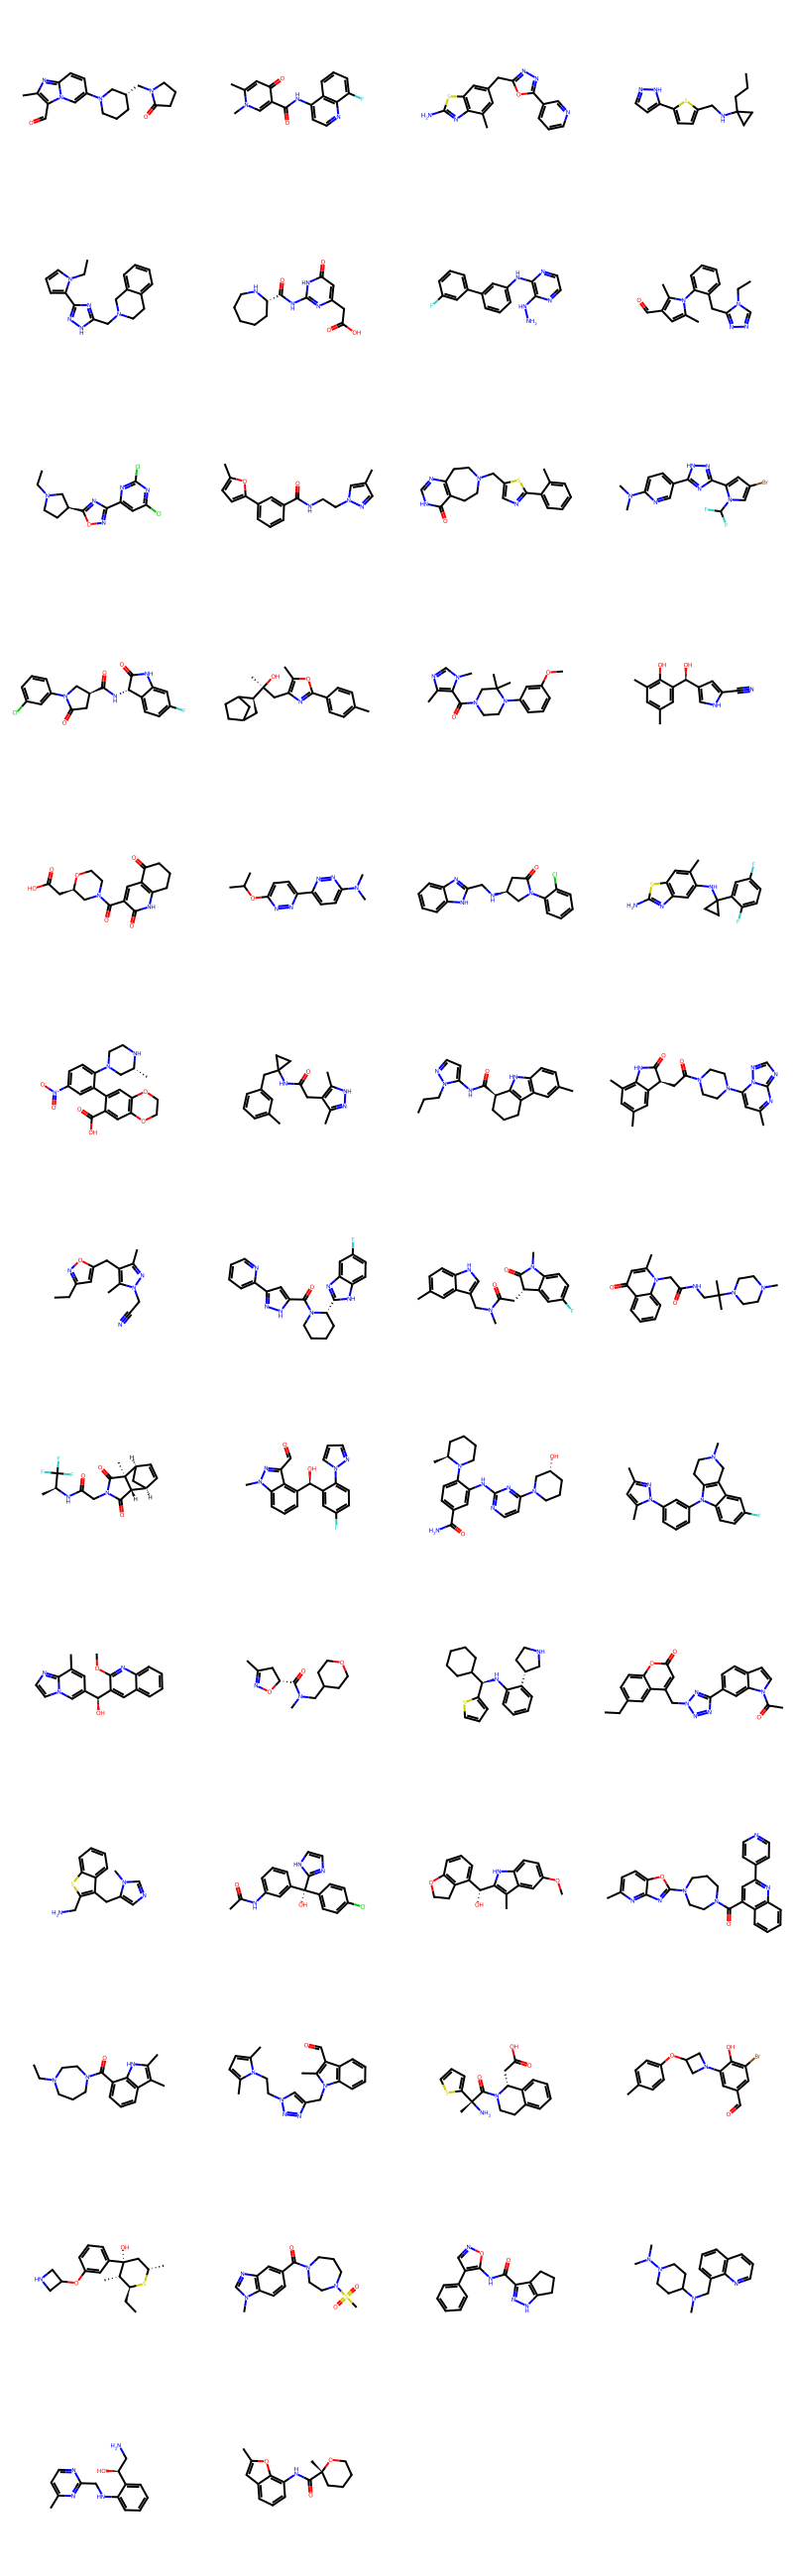

In [48]:
Draw.MolsToGridImage(np.asarray(finger_dict["128"][1])[[0] + list(tani_dict["2048"])], molsPerRow=4,subImgSize=(200,200))

In [ ]:
Draw.MolsToGridImage(np.asarray(finger_dict["2048"][1])[[0] + list(tani_dict["128"])], molsPerRow=4,subImgSize=(200,200))

c:\Users\ruite\miniforge3\envs\ai_factory\Lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:343: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


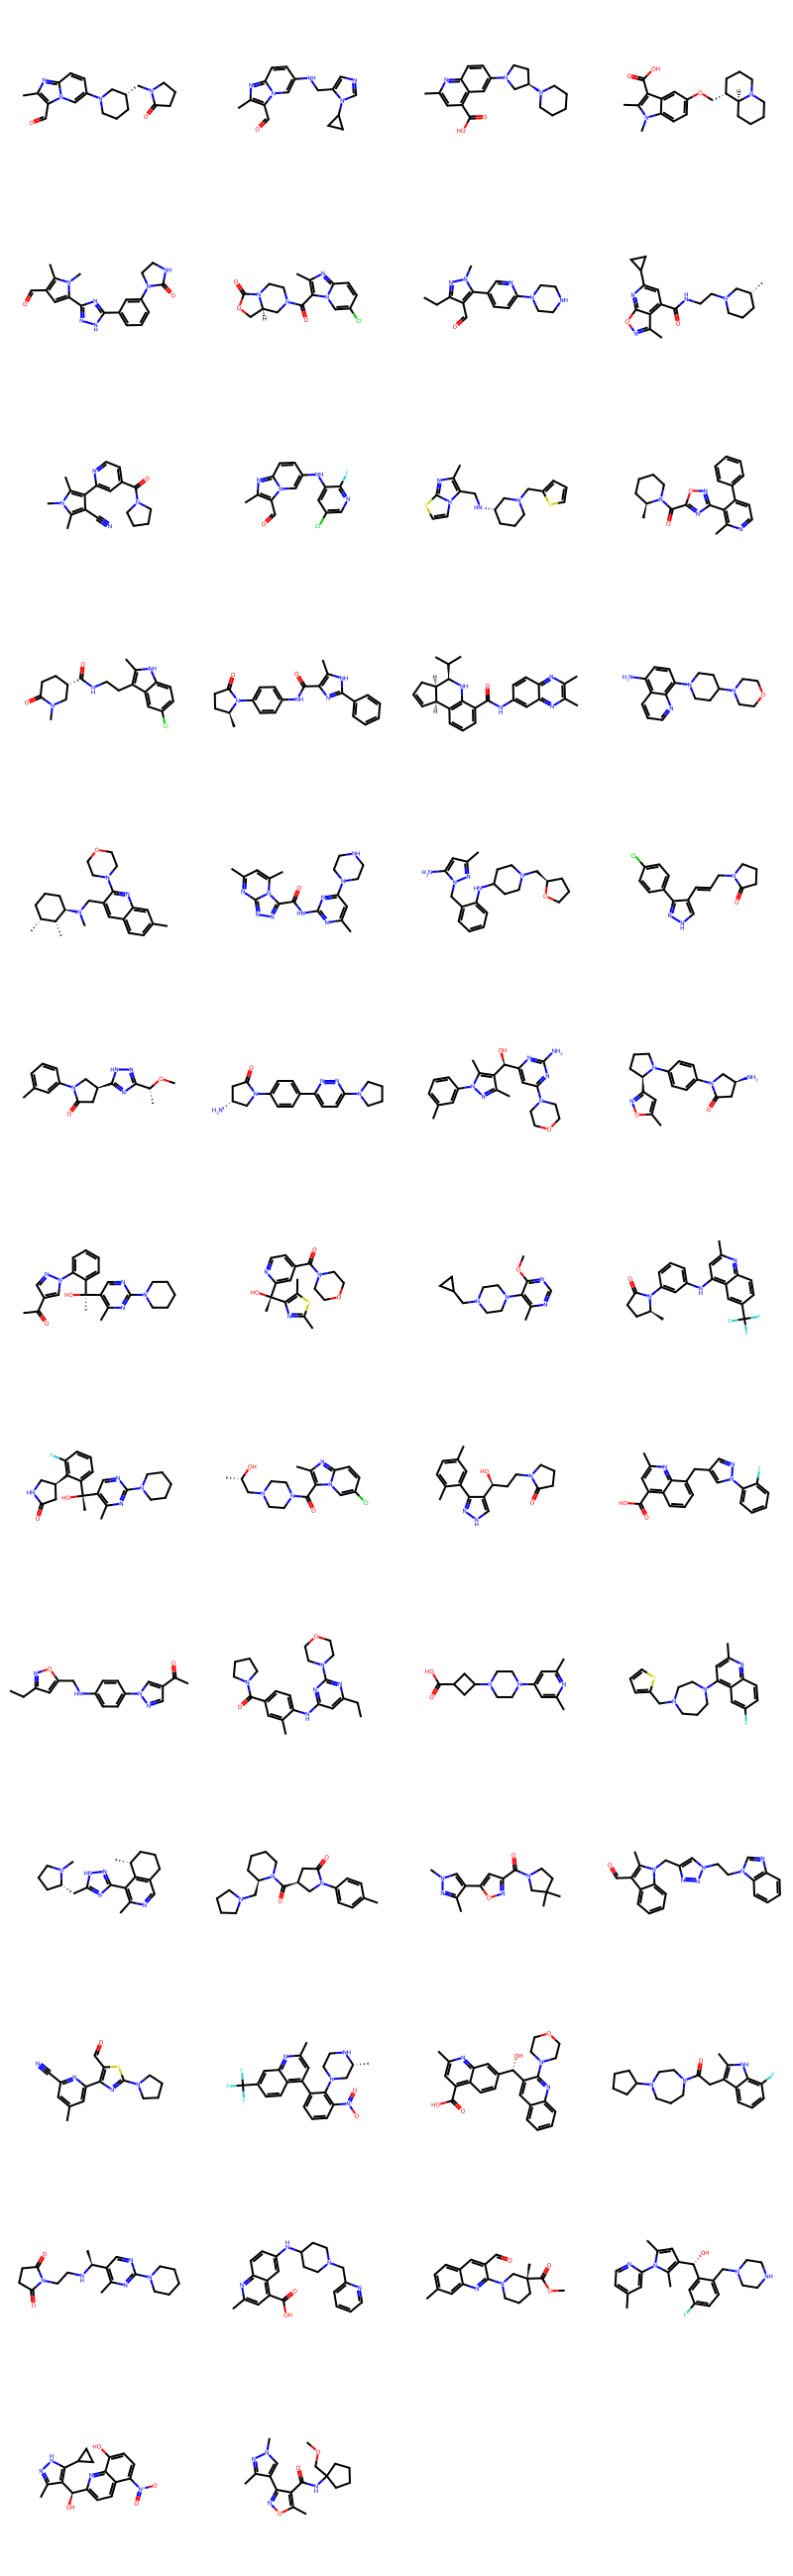

In [78]:
Draw.MolsToGridImage(np.asarray(finger_dict["2048"][1])[id2[0]], molsPerRow=4,subImgSize=(200,200))

### Calculate fingerprints

In [9]:
import h5py
import dask.dataframe as dd
from dask import array

In [135]:
calc = FPCalculator("ecfp", radius=2, fpSize=1024)
new_100 = df["SMILES"].apply(smiles_to_fp)

In [73]:
new_100.to_frame().to_parquet("ecfp_1024_radius2.parquet", index=True, compression="gzip")

In [39]:
new_100 = pd.read_hdf("ecfp_1024_radius2.hdf", key="test")
np.stack(new_100.values)

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [69]:
os.path.getsize("fingerprints.h5") / os.path.getsize('ecfp_1024_radius2.hdf')

0.04685440746519625

In [85]:
os.path.getsize("fingerprints.h5")

98514

In [75]:
os.path.getsize('ecfp_1024_radius2.parquet')

63454

In [90]:
# Example
N = 1_000
fp_length = 1024 # bytes
with h5py.File('fingerprints.h5', 'w') as f:
    # Create dataset for fingerprints
    f.create_dataset('fingerprints', shape=(N, fp_length), dtype='uint8', compression="gzip", compression_opts=9, data=np.stack(new_100.values), chunks=(100, fp_length))
    # Create dataset for molecule IDs
    dt = h5py.string_dtype(encoding='utf-8')
    f.create_dataset('molecule_id', shape=(N,), chunks=100, data=new_100.index, dtype=dt, compression="gzip", compression_opts=9)

In [81]:
f = h5py.File('fingerprints.h5', 'r')
print(f.keys())
print(f['fingerprints'])
print(type(f['fingerprints']))
fingerprints = array.from_array(f['fingerprints'], chunks=(100))
molecule_ids = array.from_array(f['molecule_id'], chunks=(100))
f.close()

<KeysViewHDF5 ['fingerprints', 'molecule_id']>
<HDF5 dataset "fingerprints": shape (1000, 1024), type "|u1">
<class 'h5py._hl.dataset.Dataset'>


In [95]:
np.stack(pd.read_parquet("ecfp_1024_radius2.parquet")["SMILES"].values)

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

### WIth dask

In [6]:
import pyarrow as pa

In [7]:
def smiles_to_fp(smiles, fpsize=1024):
    mol = dm.to_mol(smiles, sanitize=True)
    fp = dm.to_fp(mol, radius=2, fpSize=fpsize)
    return fp

def smiles_to_fp_2(smiles):
    mol = Chem.MolFromSmiles(smiles, sanitize=True)
    fp = AllChem.GetMorganGenerator(radius=2, fpSize=1024)
    bits = fp.GetFingerprint(mol).GetOnBits()
    return " ".join(map(str, bits))

In [119]:
schema = pa.schema([
    pa.field("ID", pa.string()),
    pa.field("FP", pa.string())   # 👈 IMPORTANT: raw bytes!
])

In [19]:
smiles_to_fp("CC(=O)Oc1ccccc1C(=O)O")

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [176]:
dask_df["FP"] = dask_df["SMILES"].apply(smiles_to_fp, meta=("FP", str))
dask_df = dask_df.repartition(npartitions=2)

In [177]:
def pack_fp_column(df):
    df["FP"] = df["FP"].apply(lambda x: np.packbits(x).tobytes())
    return df

packed_df = dask_df[["ID", "FP"]]
packed_df.compute()

,ID,FP
0,CNP0074849.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,CNP0199329.1,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,CNP0228556.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,CNP0074395.1,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,CNP0265730.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
6547,CNP0270901.13,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6548,CNP0229301.2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6549,CNP0544533.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6550,CNP0151180.2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."


In [134]:
packed_df.to_parquet("fingerprints", append=True, write_index=False, schema=schema)

In [131]:
packed_df = packed_df.astype({"ID": "string", "FP": "object"})
packed_df.to_parquet("fingerprints", append=True, write_index=False, schema=schema)

In [135]:
os.path.getsize("fingerprints/part.0.parquet")

199763

In [94]:
packed_df = dd.read_parquet("fingerprints", schema=schema, blocksize="16MB")
packed_df["FP"] = packed_df["FP"].map(lambda packed: np.unpackbits(np.frombuffer(packed, dtype=np.uint8)), meta=("FP", np.array([], dtype=np.uint8)))

In [123]:
dask_df = dask_df.repartition(npartitions=2)
dask_array = dask_df["FP"].to_dask_array(lengths=True)

In [150]:
for x in dask_array.to_delayed():
    print(x.compute().shape)

(3276,)
(3276,)


## nmslib

In [142]:
import nmslib
import time

In [108]:
def fp_to_sparse_strings(fps):
    """
    Convert binary fingerprints (numpy arrays OR RDKit ExplicitBitVect)
    into sparse string format required by NMSLIB `jaccard_sparse`.

    Input:
        fps: iterable of binary vectors (e.g., numpy arrays or RDKit bit vectors)

    Output:
        List of strings like "3 19 257" → indices of bits that are 1
    """
    sparse_strings = []
    for fp in fps:
        if hasattr(fp, "GetOnBits"):  # RDKit ExplicitBitVect
            bits = fp.GetOnBits()
        else:  # Numpy array or list
            bits = list(np.where(fp == 1)[0])
        sparse_strings.append(" ".join(map(str, bits)))
    return sparse_strings

In [138]:
sim_string = fp_to_sparse_strings(fingers)
sim_string

['0 33 54 90 121 152 234 292 294 314 356 378 400 503 504 506 564 607 650 672 690 721 728 771 831 836 935',
 '4 47 67 80 126 152 173 222 225 231 314 323 356 389 407 423 468 505 553 575 650 656 694 750 770 798 807 809 841 893 926 935 1019',
 '0 33 121 179 234 283 314 330 356 378 385 400 416 428 463 493 504 564 650 672 771 849 932 935',
 '5 33 36 125 126 130 164 250 255 314 356 362 376 389 407 611 650 673 675 697 728 807 840 857 893 913 919 935 1019',
 '33 42 80 90 121 294 314 356 363 378 428 433 445 455 506 603 618 650 672 713 721 750 758 794 802 806 820 827 834 849 935 988',
 '80 121 152 189 205 222 233 463 473 492 695 739 807 823 849 899 912 926 935 993 997 998 1012 1019',
 '4 47 67 80 126 152 173 222 225 231 314 323 356 389 407 423 468 505 553 575 650 656 694 750 770 798 807 809 841 893 926 935 1019',
 '5 24 33 64 80 104 123 228 294 314 356 401 436 461 510 518 547 562 601 615 650 652 656 679 694 714 770 786 794 849 926 928 949 1002',
 '33 64 80 175 228 294 314 352 356 401 480 510 518 

In [187]:
fingers_string = [" ".join(map(str, fp)) for fp in fingers]
fingers_string

['1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [290]:
# Set index parameters
# These are the most important onese
M = 10
efC = 150

num_threads = 4
index_time_params = {'M': M, 'indexThreadQty': num_threads, 'efConstruction': efC, 'post' : 0}

In [285]:
index = nmslib.init(method='hnsw', space='jaccard_sparse', data_type=nmslib.DataType.OBJECT_AS_STRING) 
index.addDataPointBatch(sim_string)

6552

In [ ]:
index_bit = nmslib.init(method='hnsw', space='bit_jaccard', data_type=nmslib.DataType.OBJECT_AS_STRING) 
index_bit.addDataPointBatch(fingers_string)

6552

In [291]:
# Create an index
start = time.time()
index.createIndex(index_time_params)
#index_bit.createIndex(index_time_params)
end = time.time() 
print('Index-time parameters', index_time_params)
print('Indexing time = %f' % (end-start))

Index-time parameters {'M': 10, 'indexThreadQty': 4, 'efConstruction': 150, 'post': 0}
Indexing time = 0.519892


In [292]:
# Setting query-time parameters
efS = 200
query_time_params = {'efSearch': efS}
print('Setting query-time parameters', query_time_params)
index.setQueryTimeParams(query_time_params) 

Setting query-time parameters {'efSearch': 200}


In [282]:
# Querying
K=200
query_qty = len(sim_string[:2])
start = time.time() 
nbrs = index.knnQueryBatch(sim_string[:2], k = K, num_threads = num_threads)
end = time.time() 
print('kNN time total=%f (sec), per query=%f (sec), per query adjusted for thread number=%f (sec)' % 
      (end-start, float(end-start)/query_qty, num_threads*float(end-start)/query_qty)) 

kNN time total=0.002223 (sec), per query=0.001112 (sec), per query adjusted for thread number=0.004447 (sec)


In [ ]:
# Querying
K=200
query_qty = len(fingers_string[:2])
start = time.time() 
nbrs_2 = index_bit.knnQueryBatch(fingers_string[:2], k = K, num_threads = num_threads)
end = time.time() 
print('kNN time total=%f (sec), per query=%f (sec), per query adjusted for thread number=%f (sec)' % 
      (end-start, float(end-start)/query_qty, num_threads*float(end-start)/query_qty)) 

kNN time total=0.000998 (sec), per query=0.000499 (sec), per query adjusted for thread number=0.001997 (sec)


In [197]:
index.saveIndex('sparse_jaccard_index_string.bin', save_data=True)

In [166]:
os.path.getsize("sparse_jaccard_index.bin") + os.path.getsize("sparse_jaccard_index.bin.dat")

1461676

In [248]:
os.path.getsize("sparse_jaccard_index_string.bin") + os.path.getsize("sparse_jaccard_index_string.bin.dat")

1621448

In [157]:
newIndex = nmslib.init(method='hnsw', space='jaccard_sparse', data_type=nmslib.DataType.OBJECT_AS_STRING)  

In [160]:
newIndex.addDataPointBatch(sim_string)
newIndex.loadIndex('sparse_jaccard_index.bin')

In [161]:
# Setting query-time parameters and querying
print('Setting query-time parameters', query_time_params)
newIndex.setQueryTimeParams(query_time_params)

query_qty = len(sim_string[:2])
start = time.time() 
new_nbrs = newIndex.knnQueryBatch(sim_string[:2], k = K, num_threads = num_threads)
end = time.time() 
print('kNN time total=%f (sec), per query=%f (sec), per query adjusted for thread number=%f (sec)' % 
      (end-start, float(end-start)/query_qty, num_threads*float(end-start)/query_qty)) 

Setting query-time parameters {'efSearch': 100}
kNN time total=0.001538 (sec), per query=0.000769 (sec), per query adjusted for thread number=0.003076 (sec)


In [212]:
dm.similarity.cdist([sim[0]], sim[:], radius=2)[0][new_nbrs[0][0]]

array([0.        , 0.34375   , 0.36363636, 0.36363636, 0.36363636,
       0.57142857, 0.59459459, 0.61538462, 0.62162162, 0.63157895,
       0.62857143, 0.65      , 0.65      , 0.66666667, 0.66666667,
       0.68181818, 0.68292683, 0.68421053, 0.69047619, 0.72093023,
       0.72972973, 0.7       , 0.7       , 0.71428571, 0.71428571,
       0.71794872, 0.71794872, 0.71794872, 0.72093023, 0.725     ,
       0.72972973, 0.73170732, 0.77272727, 0.80952381, 0.74358974,
       0.74358974, 0.74468085, 0.77777778, 0.75      , 0.76190476,
       0.78571429, 0.76190476, 0.76595745, 0.76595745, 0.76595745,
       0.77272727, 0.76923077, 0.77272727, 0.7755102 , 0.77777778,
       0.77777778, 0.77777778, 0.7826087 , 0.78723404, 0.7826087 ,
       0.7826087 , 0.78723404, 0.7826087 , 0.78723404, 0.81818182,
       0.79166667, 0.81632653, 0.82      , 0.79591837, 0.80487805,
       0.8       , 0.8       , 0.80434783, 0.80851064, 0.80434783,
       0.80487805, 0.80851064, 0.80851064, 0.8125    , 0.84090

In [233]:
nbrs[0][0] # there some differences in jaccard when using bit_jaccard or jaccard_sparse

array([   0, 1405, 1019, 6232, 5798,  946, 5805, 3215, 1240,    2, 3367,
       2199,  151, 5993, 3330, 3077, 3014, 4690, 1161, 6358,  947, 3147,
       4957, 1169, 2933, 3559, 3225, 2407, 6418, 6517, 6459, 2531, 6463,
       4002, 3156,  237,    4, 3154, 1193, 6412, 4209, 4443, 1272, 3067,
       3070, 1271,  959, 1374, 4253, 3220, 6457, 6480, 1256, 1823, 3008,
       3028, 2104, 1080, 1942, 4061, 1371,  297, 3930, 6530,  978, 6342,
       4702, 1397,  933, 1130, 5791, 1400,  953, 3714, 2815, 2039, 2258,
       6114, 2523, 2525, 2524, 2439,  330, 6185, 4189, 1956, 3451, 1163,
       1165, 6218, 5829, 4033, 3443, 4034, 2615, 2310, 2344, 2346, 2365,
        916, 6014, 6350, 4987, 3638, 1367, 2808, 2829, 3503, 3047, 3040,
       2437, 5608, 4614, 1341, 1516, 2158, 2446, 1225,  974,  271, 6535,
       2705, 2924, 1412, 1445, 1459, 1190,  163, 6243, 6219, 1268, 1361,
       1415, 1448, 2530, 1300, 2573, 2654, 6222, 5234, 4285, 1275, 1849,
       2153, 1376, 2669, 2821, 3116, 2071, 1159, 60

#### HIDF5 file

In [170]:
import h5py

In [178]:
# Example
N = len(packed_df)
fp_length = 1024 # bytes
with h5py.File('fingerprints.h5', 'w') as f:
    # Create dataset for fingerprints
    dset_fp = f.create_dataset('fingerprints', shape=(N, fp_length), dtype='uint8', compression="gzip", compression_opts=9, chunks=(100, fp_length))
    # Create dataset for molecule IDs
    dt = h5py.string_dtype(encoding='utf-8')
    dset_id = f.create_dataset('molecule_id', shape=(N,), chunks=100, dtype=dt, compression="gzip", compression_opts=9)
        # 2️⃣ Iterate through Dask partitions
    start = 0
    
    for partition in dask_df[["ID", "FP"]].to_delayed():
        part = partition.compute()     # Load only one partition to memory
        fps = np.stack(part["FP"].values)  # Stack into NumPy
        ids = part["ID"].values  # or use a separate ID column
        end = start + len(part)
        
        # 3️⃣ Write chunk to HDF5 slices
        dset_fp[start:end] = fps
        dset_id[start:end] = ids
        
        start = end  # Move pointer forward

In [180]:
f = h5py.File('fingerprints.h5', 'r')
print(f.keys())
print(f['fingerprints'][:].shape)


<KeysViewHDF5 ['fingerprints', 'molecule_id']>
(6552, 1024)


In [179]:
os.path.getsize("fingerprints.h5")

461810

In [183]:
os.path.getsize("fingerprints/part.0.parquet")+ os.path.getsize("fingerprints/part.1.parquet")

397797

In [ ]:
# 1️⃣ Example: Fingerprint as uint8 array (1024 bits)
fp = np.random.randint(0, 2, size=1024, dtype=np.uint8)

# 2️⃣ Pack into bytes
packed = np.packbits(fp).tobytes()

# 3️⃣ Unpack back to original vector
restored = np.unpackbits(np.frombuffer(packed, dtype=np.uint8))
print(np.array_equal(fp, restored))

array([1, 0, 1, ..., 1, 0, 1], dtype=uint8)

### numpy memory maped

In [71]:
import os
from diskannpy import vectors_from_file, vectors_from_file
from inspect import getmembers
import struct

In [79]:
def numpy_to_bin_batched(out_file, array=None, npts=None, ndims=None, dtype=np.float32, batch_iter=None):
    """
    Write a DiskANN-compatible .bin file, either from a full array or from batches.

    The file layout:
        [int32: npts][int32: ndims][npts * ndims * sizeof(dtype) bytes of data]

    Parameters
    ----------
    out_file : str
        Output .bin path.
    array : np.ndarray, optional
        Full array to write at once.
    npts : int, optional
        Total number of points (required if using batch_iter).
    ndims : int, optional
        Dimensionality (required if using batch_iter).
    dtype : np.dtype
        Data type (default: np.float32).
    batch_iter : iterable, optional
        Iterator yielding batches of shape (batch_size, ndims).
    """

    # Case 1: Whole array write (simple)
    if array is not None:
        npts, ndims = array.shape
        with open(out_file, "wb") as f:
            f.write(struct.pack("i", npts))
            f.write(struct.pack("i", ndims))
            f.write(array.astype(dtype).tobytes())
        return

    # Case 2: Batched write
    if batch_iter is None:
        raise ValueError("Provide either 'array' or 'batch_iter'.")
    if npts is None or ndims is None:
        raise ValueError("'npts' and 'ndims' are required when using batch_iter.")

    # Open file and write header (number of points and dims)
    with open(out_file, "wb") as f:
        f.write(struct.pack("i", npts))
        f.write(struct.pack("i", ndims))

        # Stream batches as raw bytes
        total_written = 0
        for batch in batch_iter:
            batch = np.asarray(batch, dtype=dtype)
            if batch.shape[1] != ndims:
                raise ValueError(f"Batch dim mismatch: expected {ndims}, got {batch.shape[1]}")
            f.write(batch.tobytes())
            total_written += batch.shape[0]

        if total_written != npts:
            raise ValueError(f"Expected {npts} points, wrote {total_written}.")
        
def append_to_bin(out_file, batch, dtype=np.float32):
    """
    Append a batch of vectors to an existing DiskANN .bin file,
    and update the header (npts).
    """

    # Read current header
    with open(out_file, "r+b") as f:
        npts = np.frombuffer(f.read(4), dtype=np.int32)[0]
        ndims = np.frombuffer(f.read(4), dtype=np.int32)[0]

        # Validate batch shape
        batch = np.asarray(batch, dtype=dtype)
        if batch.shape[1] != ndims:
            raise ValueError(f"Batch dims ({batch.shape[1]}) don't match file dims ({ndims})")

        # Seek to end and append bytes
        f.seek(0, os.SEEK_END)
        f.write(batch.tobytes())

        # Update npts in header (rewind to start)
        new_npts = npts + batch.shape[0]
        f.seek(0)
        f.write(struct.pack("i", new_npts))

    print(f"✅ Appended {batch.shape[0]} vectors (total now {new_npts})")


In [34]:
f = np.memmap('memmapped.dat', dtype=np.float32,  mode='w+', shape=(all_outputs.shape[0], all_outputs.shape[1]))

In [ ]:
for i in range(0, all_outputs.shape[0], 1000):
    batch = all_outputs[i:i+1000]
    f[i:i+1000] = batch
f.flush()

In [68]:
def bacth_(all_outputs):
    for i in range(0, all_outputs.shape[0], 1000):
        batch = all_outputs[i:i+1000]
        yield batch

In [69]:
numpy_to_bin_batched(out_file="memmapped.dat", batch_iter=bacth_(all_outputs), npts=all_outputs.shape[0], ndims=all_outputs.shape[1])

In [80]:
append_to_bin(out_file="memmapped.dat", batch=all_outputs, dtype=np.float32)

✅ Appended 100000 vectors (total now 200000)


In [82]:
a = vectors_from_file("memmapped.dat", dtype=np.float32)

In [89]:
np.equal(a[:100000], all_outputs).all(), np.equal(a[100000:], all_outputs).all()

(np.True_, np.True_)

In [97]:
os.path.getsize("memmapped.dat")/1000_000_000_000 * (100_000_0000_000 / 100_000)

3072.0000800000003

## FP sim and bitbound

In [2]:
from FPSim2.io import create_db_file
import h5py
import pandas as pd
from glob import glob
from pathlib import Path
import pyarrow.parquet as pq
import ray
import os
import hashlib, struct
from FPSim2.scripts.create_fpsim2_fp_db import create_db_file_parallel
from FPSim2 import FPSim2Engine
import numpy as np

In [3]:
def string_to_int64(s: str) -> int:
    h = hashlib.blake2b(s.encode("utf-8"), digest_size=8)
    v = struct.unpack('>Q', h.digest())[0]
    return v - (1 << 64) if v >= (1 << 63) else v

In [4]:
def make_molecule_id(string_id: str, db_id: int, hac: int) -> int:
    """
    Generate a 64-bit integer ID combining:
      - 7 bits: db_id  (0-127)
      - 11 bits: HAC   (0-2047)
      - 46 bits: hash of the string_id
    """
    if not (0 <= db_id < 128):
        raise ValueError("db_id must fit in 7 bits (0-127).")
    if not (0 <= hac < 2048):
        raise ValueError("HAC must fit in 11 bits (0-2047).")

    # Hash the string deterministically to 8 bytes (64 bits)
    h = hashlib.blake2b(string_id.encode("utf-8"), digest_size=8)
    v = struct.unpack(">Q", h.digest())[0]

    # Keep only 46 bits of the hash
    v &= (1 << 46) - 1

    # Pack bits: [db_id | HAC | hash]
    encoded = (db_id << (11 + 46)) | (hac << 46) | v

    return encoded


def make_packed_id(s: str, db_id: int=3, hac: int=100,
                   db_bits: int = 5, hac_bits: int = 10, hash_bits: int = 50) -> int:
    """Pack db_id, HAC, and a truncated hash into a single 64-bit integer.
        The db_bits determine the maximum number allowed -> for db_bits of 5. It means db_id can
        be up to 2^db_bits -> 32 databases.
        2^hac_bits for up to 1024 HAC counts
        The hash_bits controls the uniqueness of the IDs generated -> there could be collisions with the same hash IDs although it  might be improbable for them to also have the same HAC and db_id
    
    """
    assert db_id < (1 << db_bits)
    assert hac < (1 << hac_bits)
    h = hashlib.blake2b(s.encode("utf-8"), digest_size=8)
    full_hash = struct.unpack(">Q", h.digest())[0]
    hash_part = full_hash & ((1 << hash_bits) - 1)
    packed = (db_id << (hac_bits + hash_bits)) | (hac << hash_bits) | hash_part
    return packed

def decode_packed_id(packed: int, db_bits: int = 5, hac_bits: int = 10, hash_bits: int = 50):
    """Extract db_id, HAC, and hash from a packed integer."""
    hash_part = packed & ((1 << hash_bits) - 1)
    hac = (packed >> hash_bits) & ((1 << hac_bits) - 1)
    db_id = (packed >> (hac_bits + hash_bits)) & ((1 << db_bits) - 1)
    return {"db_id": db_id, "hac": hac, "hash_part": hash_part}

mol_id = make_packed_id("CCNI", db_id=2, hac=16)
print(mol_id)
print(decode_packed_id(mol_id))

2324594136910385188
{'db_id': 2, 'hac': 16, 'hash_part': 736729187209252}


In [7]:
# Initialize Ray (auto detects cores, can also connect to a Ray cluster)
ray.init(ignore_reinit_error=True, log_to_driver=False)

@ray.remote
def convert_parquet_to_smi_chunk(parquet_path, out_dir, smiles_col="SMILES", id_col="ID", 
                                 batch_size=100_000):
    """
    Convert a single Parquet file to a temporary .smi chunk file.
    Executed as a Ray task.
    """
    parquet_file = pq.ParquetFile(parquet_path)
    smi_temp = Path(out_dir) / (Path(parquet_path).stem + ".smi")

    buffer = []
    count=0
    with open(smi_temp, "w", encoding="utf-8") as f:
        for batch in parquet_file.iter_batches(columns=[smiles_col, id_col], batch_size=batch_size):
            df = batch.to_pandas()
            lines = [f"{row[smiles_col]} {i}\n" for i, (_, row) in enumerate(df.iterrows(), count)]
            buffer.extend(lines)
            count += len(df)
            # Flush periodically to keep memory small
            if len(buffer) >= 100_000_000:
                f.writelines(buffer)
                buffer.clear()

        if buffer:
            f.writelines(buffer)

    return str(smi_temp)


def ray_parquet_to_smi(parquet_files, out_smi, smiles_col="SMILES", id_col="ID", batch_size=100_000):
    """
    Convert multiple Parquet files to a single .smi file using Ray for concurrency.
    Each file is processed in parallel as a Ray task.
    """
    out_dir = Path(out_smi).parent / "_tmp_smi_chunks"
    out_dir.mkdir(exist_ok=True)

    print(f"🚀 Launching {len(parquet_files)} Ray tasks...")

    # Step 1. Launch Ray tasks for each Parquet file
    futures = [
        convert_parquet_to_smi_chunk.remote(pq_file, str(out_dir), smiles_col, id_col, batch_size)
        for pq_file in parquet_files
    ]

    # Step 2. Collect all temporary chunk file paths
    chunk_files = ray.get(futures)

    # Step 3. Merge all .smi chunks into the final file
    print("🧷 Combining temporary chunks...")
    with open(out_smi, "w", encoding="utf-8") as out_f:
        for chunk_file in chunk_files:
            with open(chunk_file, "r", encoding="utf-8") as cf:
                out_f.writelines(cf)
            os.remove(chunk_file)

    out_dir.rmdir()
    print(f"✅ Done! Combined {len(chunk_files)} Parquet files into {out_smi}")

    # Shutdown Ray when done (optional if you’ll reuse the cluster)
    ray.shutdown()

2025-11-14 21:36:09,504	INFO worker.py:2004 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
/home/ruite/miniforge3/envs/ai_factory/lib/python3.12/site-packages/ray/_private/worker.py:2052: FutureWarning: Tip: In future versions of Ray, Ray will no longer override accelerator visible devices env var if num_gpus=0 or num_gpus=None (default). To enable this behavior and turn off this error message, set RAY_ACCEL_ENV_VAR_OVERRIDE_ON_ZERO=0
  warnings.warn(


In [15]:
# Collect all parquet files
parquet_files = sorted(glob(f"../../Molecular_database/HAC_19/*.parquet"))
do = dd.read_parquet(parquet_files)
num = do.map_partitions(len).sum().compute()
do = do.reset_index(drop=True)
do["num_ID"] = do.index
do.to_parquet("test_files")

In [9]:
# Write to single .smi file efficiently
ray_parquet_to_smi(parquet_files, "all_molecules.smi")

🚀 Launching 12 Ray tasks...
🧷 Combining temporary chunks...
✅ Done! Combined 12 Parquet files into all_molecules.smi


I0000 00:00:1763138957.713145    9276 chttp2_transport.cc:1182] ipv4:192.168.1.33:64837: Got goaway [2] err=UNAVAILABLE:GOAWAY received; Error code: 2; Debug Text: Cancelling all calls {created_time:"2025-11-14T17:49:17.713136317+01:00", http2_error:2, grpc_status:14}


In [ ]:
mols = [['CC', 1], ['CCC', 2], ['CCCC', 3]]
create_db_file(
    mols_source=mols,
    filename='fp_db.h5',
    mol_format='smiles', # required
    fp_type='Morgan',
    fp_params={'radius': 2, 'fpSize': 256}
)

In [10]:
create_db_file_parallel(
    smi_file="all_molecules.smi", 
    out_file="fp_db.h5", 
    fp_type="Morgan", 
    fp_params={"radius": 2, "fpSize": 256}, 
    full_sanitization=False, 
    num_processes=4
)

In [114]:
create_db_file_parallel(
    smi_file="all_molecules.smi", 
    out_file="fp_db_512.h5", 
    fp_type="Morgan", 
    fp_params={"radius": 2, "fpSize": 512}, 
    full_sanitization=False, 
    num_processes=4
)

In [ ]:
f = h5py.File('fp_db.h5', 'r')

array([( 8371277525678183035,     562951295598592,                   0,                  16,                   0,                0,           134217728,   36028797086072832, 9223372036854775808,  8),
       ( 4814098018668264068, 2882303761651335168,            33554432, 2314850208468434944,                   0,         16777216,  576460821022900224,          8589934592,    2251799813685248, 11),
       ( 5315160072285096298,          1073742848, 2305843009213693952,   36028797035741216,      17592190238720,         16777216,      70368879509504,         17179869184,                   0, 14),
       ( 8549176361040292908,          1073741824, 2305843009213693952,  324259173170675744,    9007199254740992,         16777224,      70368879509504,           134234112,                   0, 14),
       (-4420910204157107421,         69793218560, 9223389629040820224,               73760, 4611688217450643456,  562949953421312,      70371025879072,                   0,        549755813888, 15),


In [13]:
os.path.getsize('fp_db.h5')/1024

45828.1484375

In [118]:
(os.path.getsize('fp_db.h5')/1000_000_000) * 100_000_000_000/f["fps"].shape[0]

4951.850545200995

In [117]:
100_000_000_000/f["fps"].shape[0]

33314.044501566925

In [82]:

fp_filename = 'fp_db.h5'
fpe = FPSim2Engine(fp_filename)

query = 'CO[C@](C)(CO)C(=O)N1CCOC[C@H](C(=O)NCC=CC2CC2)C1'
results = fpe.top_k(query, k=100, threshold=0.4, metric='tanimoto', n_workers=4)
results

array([( 49009, 0.4385965 ), ( 49008, 0.4385965 ), ( 61997, 0.42857143),
       ( 62000, 0.42857143), ( 61998, 0.42857143), ( 61999, 0.42857143),
       ( 48427, 0.41935483), ( 48423, 0.41935483), ( 48430, 0.41935483),
       ( 48426, 0.41935483), ( 48428, 0.41935483), ( 48425, 0.41935483),
       ( 48429, 0.41935483), ( 48424, 0.41935483), ( 96675, 0.41666666),
       (107461, 0.41666666), (107462, 0.41666666), ( 96674, 0.41666666),
       (100216, 0.41538462), (100217, 0.41538462), (100215, 0.41538462),
       (100218, 0.41538462), (107824, 0.41269842), (107826, 0.41269842),
       (107825, 0.41269842), (107823, 0.41269842), (112540, 0.40983605),
       (  9065, 0.40983605), (112539, 0.40983605), (  9064, 0.40983605),
       (112541, 0.40983605), (112538, 0.40983605), ( 37846, 0.40677965),
       ( 37845, 0.40677965), ( 60311, 0.40625   ), (149477, 0.40625   ),
       (149476, 0.40625   ), ( 60310, 0.40625   ), ( 60309, 0.40625   ),
       ( 60312, 0.40625   ), (107673, 0.4032258 ), 

In [85]:

with open("all_molecules.smi") as w:
    w = [x.strip() for x in w.readlines()]

In [86]:
w[:10]

['N#Cc1ncccc1N1Cc2cc(Br)ccc2C1=O 0',
 'Cc1cc(N)cnc1N1Cc2cc(Br)ccc2C1=O 1',
 'Cc1cc(N2Cc3cc(Br)ccc3C2=O)cnc1N 2',
 'Cc1cc(N2Cc3cc(Br)ccc3C2=O)cnc1N 3',
 'O=C1c2ccc(Br)cc2CN1Cc1ccc(F)cc1 4',
 'O=C1c2ccc(Br)cc2CN1CCc1ccncc1 5',
 'CNc1ccccc1N1Cc2cc(Br)ccc2C1=O 6',
 'Cc1cc(N2Cc3cc(Br)ccc3C2=O)[nH]c(=O)c1 7',
 'O=C1c2ccc(Br)cc2CN1c1cc(Cl)ccc1O 8',
 'Cc1cc(Cl)cnc1N1Cc2cc(Br)ccc2C1=O 9']

In [ ]:
def qeurying(
    db_name:str, 
    query: str | list[str], 
    top_k: int=100,
    threshold: float = 0.5,
    workers=4):
    
    fpe = FPSim2Engine(db_name)
    search = {}
    if isinstance(query, str):
        query = [query]
    for que in query: 
        results = fpe.top_k(query, k=top_k, threshold=threshold, metric='tanimoto', n_workers=workers)
        search[que] = results
        
    return search

In [ ]:
def find_hac_by_index(index_file: str, search_results: dict[str, np.array]):
    with open(index_file, "r") as st:
        lines = {int(x.strip().split("#")[-1]): int(x.split("#")[0].strip("HAC")) for x in st.readlines()}
    hac_dict = {}
    bounds = np.array(sorted(lines.keys()))
    for query, index in search_results.items():
        index = sorted([x[0] for x in index])
        i = np.unique(np.searchsorted(bounds, index, side="right"))
        hacs = [lines.get(x) for x in bounds[i]]
        hac_dict[query] = hacs
    return hac_dict


In [21]:
bounds = [10, 100, 1000]
index = [5, 36, 72, 100, 300]
i = np.unique(np.searchsorted(bounds, index, side="right"))
np.array(bounds)[i]

array([  10,  100, 1000])

In [17]:
results = fpe.on_disk_top_k(query, k=100, threshold=0.4, metric='tanimoto', n_workers=1)

In [19]:
first = sorted([x[0] for x in results])
first

[9064,
 9065,
 9801,
 9802,
 9803,
 9804,
 35255,
 35256,
 37845,
 37846,
 48423,
 48424,
 48425,
 48426,
 48427,
 48428,
 48429,
 48430,
 48951,
 48952,
 48953,
 48954,
 48955,
 48956,
 48957,
 48958,
 49008,
 49009,
 60309,
 60310,
 60311,
 60312,
 61997,
 61998,
 61999,
 62000,
 79792,
 79793,
 82802,
 82803,
 96674,
 96675,
 100215,
 100216,
 100217,
 100218,
 107461,
 107462,
 107673,
 107674,
 107823,
 107824,
 107825,
 107826,
 112538,
 112539,
 112540,
 112541,
 149476,
 149477]

In [ ]:
hacs = [12, 16]


### Query using Duckdb

In [21]:
import duckdb 

In [22]:
def convert_hac_topath(
    hac_dict: dict[str, str], 
    database_path: str):
    parquet_paths = {}
    for query, hac in hac_dict.items():
        parquet_paths[query] = f"{database_path}/HAC_{hac}/*.parquet"
    return parquet_paths

def retrieve_smiles(
    duck_con,
    indices: list[int],
    parquet_path: list[str],
    return_cols: list[str]=["SMILES", "db_id", "num_ID"],
    id_col="num_ID"
    ):
    
    return_cols = ",".join(return_cols)
    res = duck_con.execute(f"SELECT {return_cols} FROM read_parquet({parquet_path}) WHERE {id_col} IN {indices})").df()
    return res

def batch_retrieve(
    search_result: dict[str, int], 
    parquet_paths: dict[str, str],
    return_cols: list[str]=["SMILES", "db_id", "num_ID"],
    id_col="num_ID"
    ):
    
    #extract the index from the FPSIM2 results and generate the combined path and indices
    index_dict = {query: sorted([u[0] for u in ind]) for query, ind in search_result.items()}
    parquet = set()
    index = set()
    for i in parquet_paths.values():
        parquet.update(i)
    for i in index_dict.values():
        index.update(i)
     
    # connect to database and search using the combined indices and parquet files   
    db_con = duckdb.connect()
    res = retrieve_smiles(db_con, sorted(index), list(parquet), return_cols, id_col)
    result = {}
    for query, index in index_dict.items():
        result[query] = res[res[id_col].isin(index)]
    
    return result

In [23]:
db = duckdb.connect()

In [41]:
a = ",".join(["SMILES", "db_id", "num_ID"])
a

'SMILES,db_id,num_ID'

In [52]:
res = db.execute(f"SELECT SMILES, db_id, num_ID FROM read_parquet($path) WHERE num_ID in $query", {"path":["test_files/*.parquet"], 
                                                                                 "query": [20, 70, 30]}).df()

In [45]:
index=[20]

In [46]:
p = {"sjdsjd": res[res["num_ID"].isin(index)]}
pd.concat(p)

SMILES db_id  num_ID
sjdsjd 0            N[C@H]1CCC[C@H]1C(=O)N1Cc2cc(Br)ccc2C1=O   009      20
       3                     C#Cc1cccc(N2Cc3cc(C)ccc3C2=O)c1   009      20
       6                       CCn1ncc(CN(C)Cc2cn(C)nc2C)c1C   011      20
       9                   c1cnnc(-c2nnnn2CC[C@@H]2CCCCN2)c1   011      20
       12                Cc1nc(NC(=O)CCc2cn[nH]c2)c(Br)cc1Br   009      20
       15          Nc1cccc2c1CN(C(=O)[C@@H]1CCC[C@@H]1N)C2=O   009      20
       18           C[C@@H](NC(=O)Cn1nnnc1N)[C@@H]1CC2CCC1C2   011      20
       21                    O=C(Nc1cc(-c2ccccc2)no1)c1ccon1   011      20
       24  CC[C@@H]1S[C@@H](C)C[C@H](N[C@@H](C)c2nnc(C)o2...   011      20
       27                  Cc1cc(=O)c(C(=O)Nc2nc(N)nn2C)cn1C   011      20
       30               C[C@@H](Cn1nnnc1N)N1CCC[C@H]1c1nccs1   011      20
       33                     CNc1ncc(-c2c(O)nc3ccccc3c2C)s1   011      20
       36           N[C@H]1CCC[C@H]1C(=O)N1Cc2cc(Br)ccc2C1=O   009      20
       39                    C#Cc1cccc(N2Cc3cc(C)ccc3C2=O)c1   009      20
       42                      CCn1ncc(CN(C)Cc2cn(C)nc2C)c1C   011      20
       45                  c1cnnc(-c2nnnn2CC[C@@H]2CCCCN2)c1   011      20
       48                Cc1nc(NC(=O)CCc2cn[nH]c2)c(Br)cc1Br   009      20
       51          Nc1cccc2c1CN(C(=O)[C@@H]1CCC[C@@H]1N)C2=O   009      20
       54           C[C@@H](NC(=O)Cn1nnnc1N)[C@@H]1CC2CCC1C2   011      20
       57                    O=C(Nc1cc(-c2ccccc2)no1)c1ccon1   011      20
       60  CC[C@@H]1S[C@@H](C)C[C@H](N[C@@H](C)c2nnc(C)o2...   011      20
       63                  Cc1cc(=O)c(C(=O)Nc2nc(N)nn2C)cn1C   011      20
       66               C[C@@H](Cn1nnnc1N)N1CCC[C@H]1c1nccs1   011      20
       69                     CNc1ncc(-c2c(O)nc3ccccc3c2C)s1   011      20

In [80]:
a = set()
b = [[("test_1/*.parquet", 2), ], [("Tes_2/*parquet",2), ("test_1/*.parquet", 2)]]
for i in b:
    a.update(u[0] for u in i) 
a

{'Tes_2/*parquet', 'test_1/*.parquet'}

In [81]:
import numpy as np
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem

mol = Chem.MolFromSmiles('CO[C@](C)(CO)C(=O)N1CCOC[C@H](C(=O)NCC=CC2CC2)C1')
mol2 = Chem.MolFromSmiles('CC1=CC=CC=C1')

def return_fp(mol):
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=256)

    # Convert RDKit ExplicitBitVect → numpy uint8 array
    arr = np.zeros((4,), dtype=np.uint64)
    bits = np.zeros((256,), dtype=np.uint8)
    DataStructs.ConvertToNumpyArray(fp, bits)

    # Pack bits into uint64 blocks
    for i in range(4):
        chunk = bits[i*64:(i+1)*64]
        arr[i] = np.packbits(chunk[::-1]).view(np.uint64)
    return arr, bits

arr1, bits = return_fp(mol)
arr2, bits2 = return_fp(mol2)

[15:23:24] DEPRECATION WARNING: please use MorganGenerator
/tmp/ipykernel_25263/2007420548.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  arr[i] = np.packbits(chunk[::-1]).view(np.uint64)
[15:23:24] DEPRECATION WARNING: please use MorganGenerator


In [84]:
bits.sum(),bits2.sum()

(49, 10)

## Test deduplicator

In [14]:
out_path = Path("../../Molecular_database")
hacs = sorted(out_path.glob("HAC_[1,2]"))

In [16]:
def assign_ids(df, partition_offsets, global_offset, meta):
    """
    Assign unique sequential IDs per partition using map_partitions.
    `partition_offsets` must be broadcast as list of integers.
    """
    # Each partition gets its starting offset from partition_offsets
    def add_ids(partition, partition_info=None):
        pid = partition_info["number"]
        offset = partition_offsets[pid]
        partition["num_ID"] = np.arange(len(partition), dtype=np.int64) + global_offset + offset
        return partition

    return df.map_partitions(add_ids, meta=meta)

In [20]:
current_offset = 0
meta = {"ID": "string", "SMILES": "string", "db_id": "string", "num_ID": "int64"}
use_cols=["ID", "SMILES"]
test = []
for hac_folders in hacs:
    hac = hac_folders.name.split("_")[-1]
    ddf_merged = dd.read_parquet(f"{hac_folders}/*.parquet",
                                columns=[*use_cols, "db_id"])
    ddf_merged = ddf_merged.drop_duplicates(subset=["ID"]).drop_duplicates(subset="SMILES")
    # Compute number of rows per partition (fast metadata op)
    partition_lengths = ddf_merged.map_partitions(len).compute()
    print(partition_lengths)
    partition_offsets = np.insert(np.cumsum(partition_lengths[:-1]), 0, 0)
    print(partition_offsets)
    ddf_merged = assign_ids(ddf_merged, partition_offsets, current_offset, meta)
    ddf_merged = ddf_merged.repartition(npartitions=5)
    test.append(ddf_merged.compute())
    count = int(sum(partition_lengths))
    current_offset = current_offset + count
    

0    2
0    3
0    2
0    2
0    1
    ..
0    6
0    3
0    0
0    1
0    3
Length: 219, dtype: int64
[  0   2   5   7   9  10  12  14  15  18  22  23  24  28  29  32  35  37
  39  41  42  43  44  47  50  51  53  54  54  55  59  62  65  66  67  70
  72  75  75  75  76  79  82  85  87  91  93  93  94  98 100 103 105 108
 111 114 115 116 118 121 124 126 126 128 129 130 133 136 137 140 140 142
 144 147 148 152 153 154 154 155 158 159 161 162 163 164 165 166 170 172
 176 177 178 181 183 188 188 192 195 198 199 199 203 207 208 210 216 220
 221 221 222 222 222 223 226 229 232 236 239 240 242 247 251 252 255 257
 262 266 266 267 270 271 274 275 277 280 281 281 282 283 287 290 291 293
 297 298 301 302 302 304 305 310 311 313 316 319 320 321 323 325 327 329
 331 335 336 338 340 342 343 344 346 346 348 354 355 358 358 360 364 364
 365 367 370 373 374 378 380 383 385 386 386 387 389 390 393 395 397 401
 402 402 407 409 413 413 414 415 416 421 423 426 427 429 430 433 434 440
 443 443 444]
0    10

In [32]:
test[0]

,ID,SMILES,db_id,num_ID
132,CID_158063941,[Pb+2],004,0
32,CID_12131914,[ZnH2],004,1
335,CID_10262582,[Ra],004,2
460,CID_22817963,[B],004,3
95,CID_154082653,[Ti+3],004,4
...,...,...,...,...
634,CID_71352071,[Pu],004,442
144,CID_171039292,[SnH2],004,443
514,CID_160709563,[Mn+2],004,444
1621,CID_185496,[Os+8],004,445


In [33]:
test[1]

,ID,SMILES,db_id,num_ID
6,CID_16685710,[Al+2][I],004,447
1,CID_46837398,[C-]#[Ta+],004,448
344,CID_117559,[N]#[Ga],004,449
33,CID_92025642,[O]=[BiH],004,450
47,CID_6099325,[PH]=[Ca],004,451
...,...,...,...,...
57,CID_102224502,[CH]=N,004,2151
68,CID_5257363,[CH3][GaH2],004,2152
327,CID_59499184,[CH2]=[Bi],004,2153
313,CID_160228241,[Se]=[Hg],004,2154
